# Let's make a wordcloud with the words dataframe

In [ ]:
!pip install wordcloud matplotlib


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('/content/combined_word_counts_kids.csv')

# List of words to exclude (because we are not interested in names used in the titles)
exclude_patterns = ['iana', 'astya', 'endy', 'hris', 'и', 'lad', 'iki', 'tacy', 'annie']

# Exclude rows where 'word' contains any pattern
filtered_df = df[~df['word'].str.contains('|'.join(exclude_patterns), case=False, na=False)]

print(filtered_df.head(20))


         word  count
0         kid    520
1        play    498
5       story    331
6     pretend    303
7         dad    294
8         toy    286
11      learn    224
12        rom    210
15  challenge    162
16  adventure    159
19       song    131
20     friend    128
21        For    127
22      video    122
23      funny    119
24        fun    119
25          в    116
27   children    111
28       emma    105
29     oliver     98


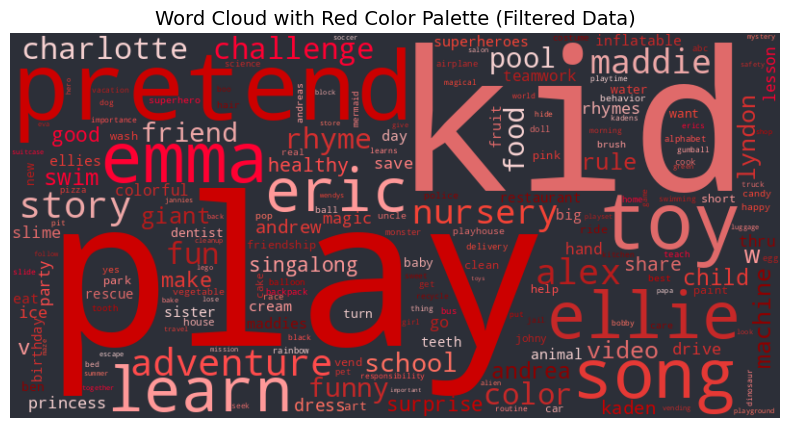

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import random

# Step 1: Define the red-only color palette for our project
CUSTOM_RED_COLORS = [
    '#d32f2f', '#e06a6a', '#eda7a7', '#f5d0d0',  # Light to medium reds
    '#b71c1c', '#ff0032', '#8b0000', '#ff4c4c',  # Dark and bright reds
    '#ff6f61', '#ff9999', '#cc0000', '#e53935',  # Additional red variations
    '#f44336', '#ff7f7f', '#c62828'              # Deep reds for contrast
]

# Step 2: Create a custom color function
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return random.choice(CUSTOM_RED_COLORS)

# Step 3: Prepare text data for the WordCloud from the filtered DataFrame
word_freq = dict(zip(df['word'],df['count']))  # Use filtered data

# Step 4: Generate the Word Cloud with the custom red-only color function
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='#2c2f38',  # Ensure clear visibility on gray backgrounds
    color_func=custom_color_func
).generate_from_frequencies(word_freq)

# Step 5: Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axes
plt.title("Word Cloud with Red Color Palette (Filtered Data)", fontsize=14)
plt.show()

# Step 6: Save the Word Cloud as an image
wordcloud.to_file('/content/toys_wordcloud.png')
